In [30]:
#Imports

import numpy as np
import sympy as sp
from sympy import init_printing
from sympy import *
from sympy import Matrix, symbols, solve_linear_system
from sympy.interactive import printing
from sympy.printing.latex import LatexPrinter, print_latex
from sympy import Eq
printing.init_printing(use_latex=True)

In [31]:
#Data

E=float(input("E=")) #GPa (40)
a=float(input("a=")) #mm (220)
b=float(input("b=")) #mm (540)
c=float(input("c=")) #mm (730)
d=float(input("d=")) #mm (27)
p_1=float(input("p_1=")) #N/m (-3000)
F_1=float(input("F_1=")) #kN (-1)
M=float(input("M_1=")) #kNm (-1.1)

#Change to SI

E=E*10**9
a=a/1000
b=b/1000
c=c/1000
d=d/1000
F_1=F_1*1000
M=M*1000

In [32]:
#Rudak hossza

print("A rudak hosszai:")

L_1=a
print("\nL_1=",L_1*1000,"[mm]")

L_2=b-a
print("L_2=",L_2*1000,"[mm]")

L_3=c-b
print("L_3=",L_3*1000,"[mm]")

#Rudak keresztmetszete

print("\nA rudak keresztmetszetei")

A_1=d**2*np.pi/4
print("\nA_1=",A_1,"[m^2]")

A_2=(2*d)**2*np.pi/4
print("A_2=",A_2,"[m^2]")

A_3=A_2
print("A_3=",A_3,"[m^2]")

print("\nA rudak másodrendű nyomatékai")

Iz_1=d**4*np.pi/64
print("\nIz_1=",Iz_1,"[m^4]")

Iz_2=(2*d)**4*np.pi/64
print("Iz_2=",Iz_2,"[m^4]")

Iz_3=Iz_2
print("Iz_3=",Iz_3,"[m^4]")

#Rudak rugalmassagi modulusai

E_1=4*E
E_2=E
E_3=E

A rudak hosszai:

L_1= 220.0 [mm]
L_2= 320.00000000000006 [mm]
L_3= 189.99999999999994 [mm]

A rudak keresztmetszetei

A_1= 0.0005725552611167398 [m^2]
A_2= 0.002290221044466959 [m^2]
A_3= 0.002290221044466959 [m^2]

A rudak másodrendű nyomatékai

Iz_1= 2.6087049084631455e-08 [m^4]
Iz_2= 4.173927853541033e-07 [m^4]
Iz_3= 4.173927853541033e-07 [m^4]


Merevségi mátrixok:

K_ 1 =


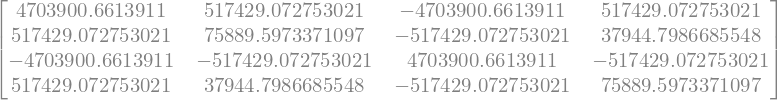


K_ 2 =


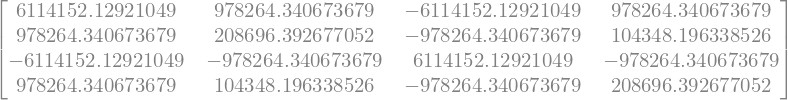


K_ 3 =


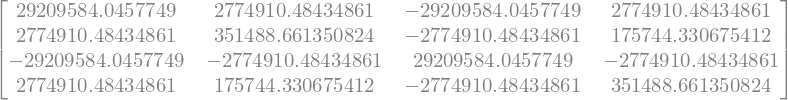

In [33]:
#Merevsegi matrixok meghatarozasa

print("Merevségi mátrixok:")

def K_matrix(Iz,Ei,L):
    K=Iz*Ei/(L**3)*sp.Matrix([[12,6*L,-12,6*L],
                              [6*L,4*L**2,-6*L,2*L**2],
                              [-12,-6*L,12,-6*L],
                              [6*L,2*L**2,-6*L,4*L**2]])
    return K

#Printing 

n=3
i=0
L_array=[L_1,L_2,L_3]
Iz_array=[Iz_1,Iz_2,Iz_3]
E_array=[E_1,E_2,E_3]
K_array=[0,0,0]
for i in range(n):
    K_array[i]=K_matrix(Iz_array[i],E_array[i],L_array[i])
    print("\nK_",i+1,"=")
    display(K_array[i])
    i=i+1

Globális merevségi mátrix:

K_glob=


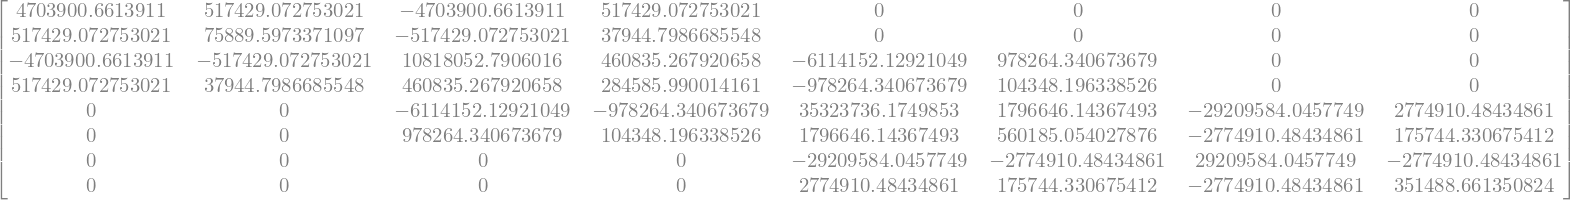

In [34]:
#Globalis merevsegi matrix

print("Globális merevségi mátrix:")

#Elem-csomopont osszerendeles

ecs = sp.Matrix([[1,2],[2,3],[3,4]])

eDOF1 = [2*ecs[0,0]-1, 2*ecs[0,0], 2*ecs[0,1]-1, 2*ecs[0,1]]
eDOF2 = [2*ecs[1,0]-1, 2*ecs[1,0], 2*ecs[1,1]-1, 2*ecs[1,1]]
eDOF3 = [2*ecs[2,0]-1, 2*ecs[2,0], 2*ecs[2,1]-1, 2*ecs[2,1]]

def ExtMatrix(mx, rows, size):
    n = len(rows)
    Mx = np.zeros((size,size))
    for i in range(n):
        for j in range(n):
            Mx[rows[i]-1,rows[j]-1] = mx[i,j]
    return Mx

K_glob = ExtMatrix(K_matrix(Iz_1,E_1,L_1), eDOF1, 8) + ExtMatrix(K_matrix(Iz_2,E_2,L_2), eDOF2, 8) + ExtMatrix(K_matrix(Iz_3,E_3,L_3), eDOF3, 8)

print("\nK_glob=")
display(sp.Matrix(K_glob))

Globális terhelésvektor:

F_glob=


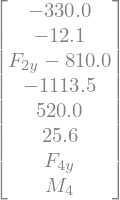


Globális elmozdulásvektor:

U_glob=


⎡v₁⎤
⎢  ⎥
⎢Θ₁⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢Θ₂⎥
⎢  ⎥
⎢v₃⎥
⎢  ⎥
⎢Θ₃⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣0 ⎦

In [35]:
#Globalis terhelesvektor

print("Globális terhelésvektor:")

#Symbols

F1_y,M_1,F2_y,M_2,F3_y,M_3,F4_y,M_4=sp.symbols("F1_y,M_1,F2_y,M_2,F3_y,M_3,F4_y,M_4")

#PF:

F1_y=0
M_1=0
M_2=M
F3_y=-F_1 #?
M_3=0

F_r=sp.Matrix(([F1_y],[M_1],[F2_y],[M_2],[F3_y],[M_3],[F4_y],[M_4]))
F_p=sp.Matrix(([p_1*L_1/2],[p_1*L_1**2/12],[p_1*(L_1+L_2)/2],[p_1*(L_2**2-L_1**2)/12],[p_1*L_2/2],[-p_1*L_2**2/12],[0],[0]))

F=F_r+F_p

print("\nF_glob=")

display(F)

#Globalis elmozdulasvektor

print("\nGlobális elmozdulásvektor:")

v_1,v_2,v_3,v_4,Θ_1,Θ_2,Θ_3,Θ_4=sp.symbols("v_1,v_2,v_3,v_4,Θ_1,Θ_2,Θ_3,Θ_4")

#PF

v_2=0
v_4=0
Θ_4=0

U=sp.Matrix([[v_1],[Θ_1],[v_2],[Θ_2],[v_3],[Θ_3],[v_4],[Θ_4]])

print("\nU_glob=")

display(U)

A kondenzált merevségi mátrix:

K_kond=


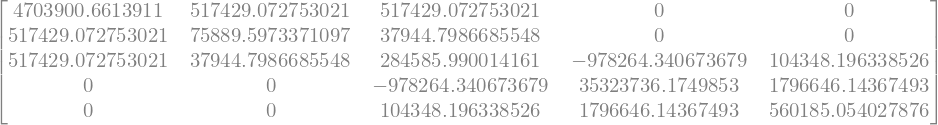


A kondenzált terhelés vektor:

F_kond=


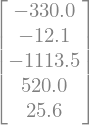


A kondenzált elmozdulás vektor:

U_kond=


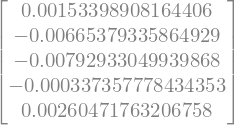


Az elmozdulás komponensek:

v_1= 1.53398908164406 [mm]
Θ_1= -0.00665379335864929 [rad]
Θ_2= -0.00792933049939868 [rad]
v_3= -0.337357778434353 [mm]
Θ_3= 0.00260471763206758 [rad]


In [36]:
#Egyenlet kondenzalas

#Kondenzalt merevsegi matrix

print("A kondenzált merevségi mátrix:")

def SubMatrix(Mx, rows):
    n = len(rows)
    mx = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            mx[i,j] = Mx[rows[i]-1,rows[j]-1]
    return sp.Matrix(mx)

freeDoF=sp.Matrix([[1,2,4,5,6]])

K_kond=SubMatrix(K_glob,freeDoF)

print("\nK_kond=")

display(K_kond)

#Kondenzalt terheles vektor

print("\nA kondenzált terhelés vektor:")

def SubVector(Mx, rows):
    n = len(rows)
    mx = np.zeros((n, 1))
    for i in range(n):
        mx[i, 0] = Mx[rows[i]-1, 0]
    return sp.Matrix(mx)

F_kond=SubVector(F,freeDoF)

print("\nF_kond=")

display(F_kond)

#Kondenzalas elmozdulas vektor

print("\nA kondenzált elmozdulás vektor:")

U_kond=sp.Matrix(np.matmul(sp.Inverse(K_kond),F_kond))

print("\nU_kond=")

display(U_kond)

#Elmozdulaskomponensek

print("\nAz elmozdulás komponensek:")

v_1=U_kond[0]
Θ_1=U_kond[1]
Θ_2=U_kond[2]
v_3=U_kond[3]
Θ_3=U_kond[4]

print("\nv_1=",v_1*1000,"[mm]")
print("Θ_1=",Θ_1,"[rad]")
print("Θ_2=",Θ_2,"[rad]")
print("v_3=",v_3*1000,"[mm]")
print("Θ_3=",Θ_3,"[rad]")

Globális elmozdulásvektor:

U_glob=


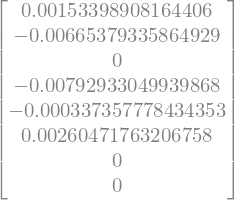


Globális terhelesvektor:

F_glob=


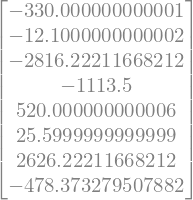


A terhelés komponensek:

F2_y= -2.00622211668212 [kN]
F3_y= 2.62622211668212 [kN]
M_3= -0.478373279507882 [kNm]


In [42]:
#Globalis elmozdulasvektor numerikusan

print("Globális elmozdulásvektor:")

U=sp.Matrix([[v_1],[Θ_1],[v_2],[Θ_2],[v_3],[Θ_3],[v_4],[Θ_4]])

print("\nU_glob=")

display(U)

#Globalis terhelesvektor

print("\nGlobális terhelesvektor:")

F=sp.Matrix(np.matmul(K_glob,U))

print("\nF_glob=")
display(F)

#Terheléskomponensek meghatározása

print("\nA terhelés komponensek:")

F2_y=F[2]-F_p[2]
print("\nF2_y=",F2_y/1000,"[kN]")

F3_y=F[6]
print("F3_y=",F3_y/1000,"[kN]")

M_3=F[7]
print("M_3=",M_3/1000,"[kNm]")

